In [ ]:
#import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

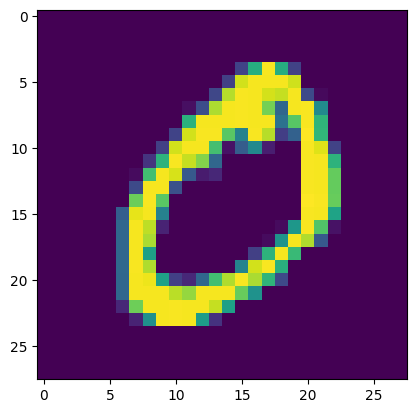

In [ ]:
plt.imshow(x_train[1])

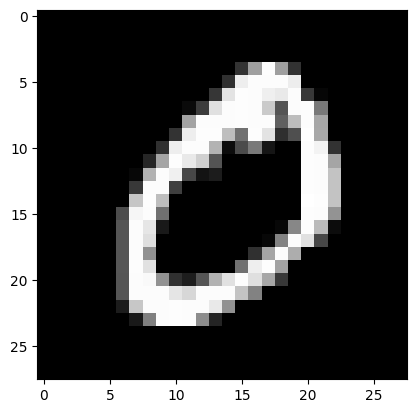

In [ ]:
plt.imshow(x_train[1], cmap = "gray")

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_test.min(), x_test.max()

(0, 255)

In [ ]:
x_train = x_train/255 #normalization
x_test = x_test/255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dense(64 , activation = "relu"),
    keras.layers.Dense(32 , activation = "relu"),
    keras.layers.Dense(10 , activation = "softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train , y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7014 - accuracy: 0.8013
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2860 - accuracy: 0.9166
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2272 - accuracy: 0.9340
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1878 - accuracy: 0.9453
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1599 - accuracy: 0.9535
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1383 - accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1212 - accuracy: 0.9638
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9682
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0965 - accuracy: 0.9715
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.087

In [ ]:
history.history

{'loss': [0.7014444470405579,
  0.2860313355922699,
  0.22720037400722504,
  0.1877949982881546,
  0.15994587540626526,
  0.13825833797454834,
  0.12121902406215668,
  0.1079438179731369,
  0.0965324267745018,
  0.0871434211730957],
 'accuracy': [0.8013499975204468,
  0.9165666699409485,
  0.9339666962623596,
  0.9452666640281677,
  0.9535166621208191,
  0.9591500163078308,
  0.9638333320617676,
  0.9681833386421204,
  0.9715499877929688,
  0.9747499823570251]}

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(y_pred[1])

2

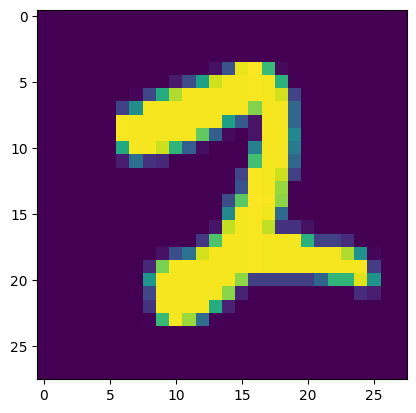


 2


In [ ]:
n = np.random.randint(10000)
plt.imshow(x_test[n])
plt.show()
print("\n", np.argmax(y_pred[n]))

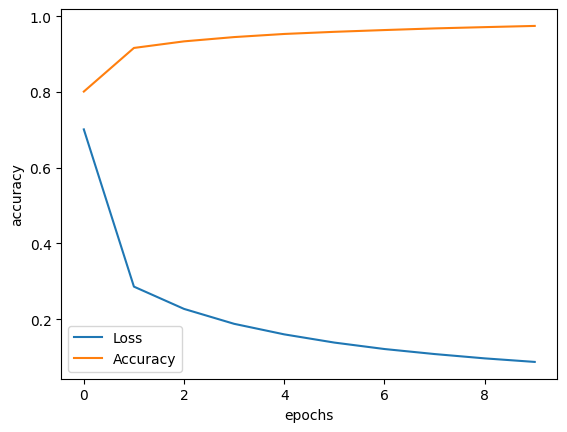

In [ ]:
#plotting
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["Loss", "Accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9688


[0.10164137184619904, 0.9688000082969666]